# Importing and Reading Files

In [2]:
pip install geopy

     |████████████████████████████████| 119 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 11.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
import geopy 
from geopy.geocoders import Nominatim 
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [49]:
#main housing data
df = pd.read_csv('data/kc_house_data.csv')

In [23]:
## Do an inner join and groupby on this
#first import zipcode csv from king co website
dfz = pd.read_csv('data/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv')
dfz.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,147643.355747,5.253133e+08
1,2,98002,98002,33,Standard,King County,AUBURN,104440.086791,2.053028e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,123619.720418,3.169395e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,109051.119162,2.017598e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116554.737369,2.114337e+08


In [41]:
df['coords'] = list(zip(df['lat'],df['long']))

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [56]:
df['waterfront'].value_counts()

NO     29600
YES      511
Name: waterfront, dtype: int64

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [8]:
df.date.max()

'9/9/2021'

In [9]:
df.date.min()

'1/1/2022'

In [10]:
df.date.value_counts()

7/1/2021      196
8/2/2021      186
6/23/2021     176
7/6/2021      176
6/16/2021     174
             ... 
12/5/2021       1
6/9/2022        1
12/25/2021      1
12/26/2021      1
1/16/2022       1
Name: date, Length: 365, dtype: int64

In [54]:
# eliminating rows with null values (but we could fill with more important information)
df = df.dropna()

In [12]:
df.shape

(30111, 26)

In [13]:
X = df.drop(columns = ['price'])
y = df['price']

In [14]:
X.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,-0.023340,-0.015077,-0.008044,-0.041644,0.023076,-0.028858,-0.000764,0.000638
bedrooms,-0.007065,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,-0.106791
bathrooms,-0.012382,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,-0.005481,0.017684
sqft_living,-0.028234,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,-0.087625
sqft_lot,-0.119276,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,-0.034408
floors,0.031941,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,0.544314,-0.025041,-0.218174,0.233589
sqft_above,-0.023340,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,-0.082722
sqft_basement,-0.015077,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,-0.230783,0.054032,0.059664,-0.045104
sqft_garage,-0.008044,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,-0.098301,0.092092,-0.096639
sqft_patio,-0.041644,0.183660,0.327982,0.396530,0.154575,0.125016,0.312593,0.210305,0.216512,1.000000,0.138112,0.056183,-0.019666,0.025675


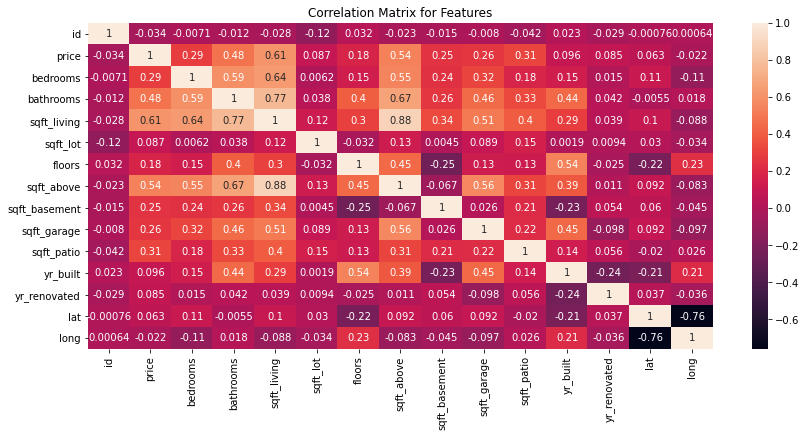

In [15]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

In [16]:
# THIS IS MY BASE MODEL

X = df[['sqft_living']]
y = df['price']

from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.37041309920532783

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

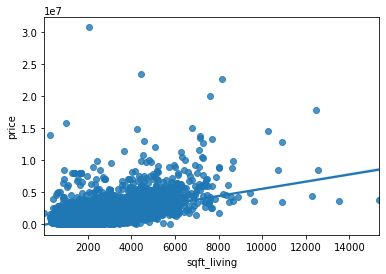

In [17]:
sns.regplot(x =df['sqft_living'],y = df['price'])

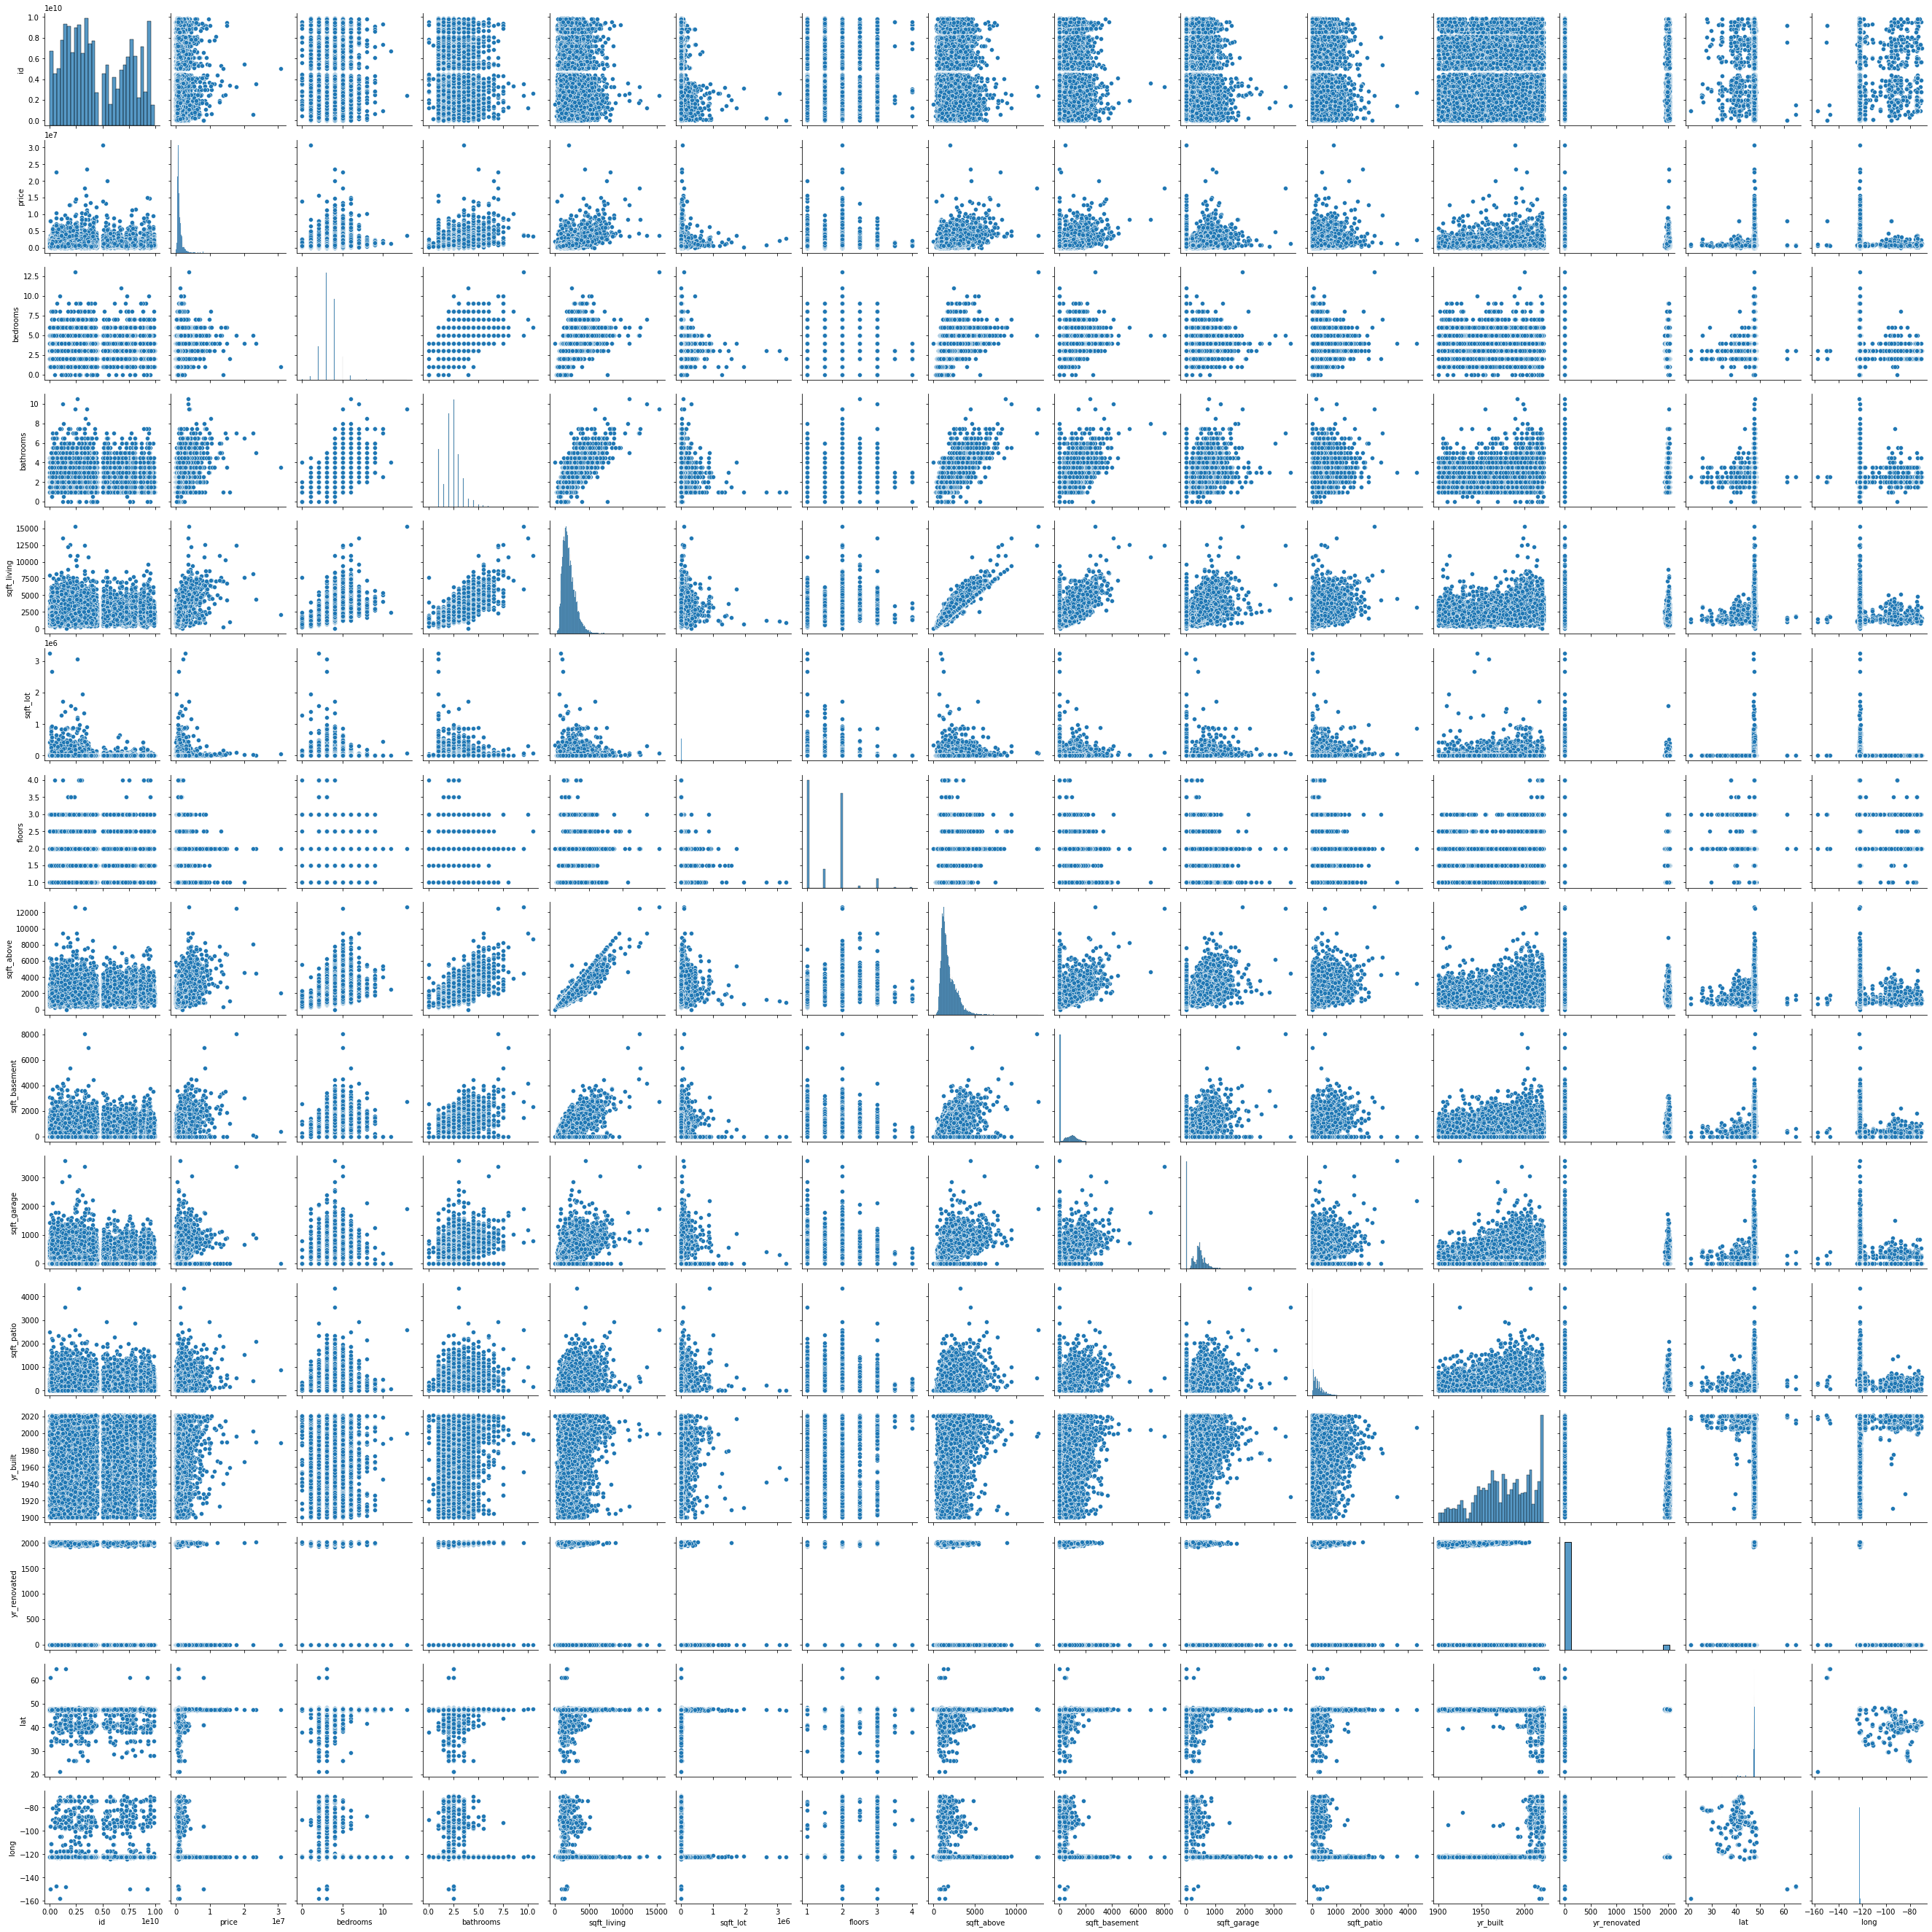

In [18]:
sns.pairplot(df)

In [62]:
df['bedrooms'].value_counts()

3     12746
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

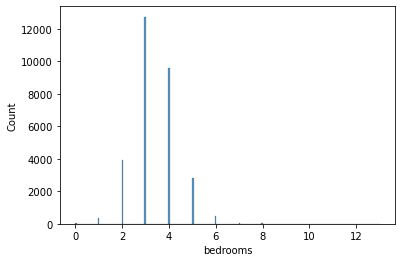

In [63]:
sns.histplot(data = df['bedrooms'])

In [64]:
# https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::zipcodes-for-king-county-and-surrounding-area-shorelines-zipcode-shore-area/explore

In [65]:
# https://gis-kingcounty.opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113/about

In [66]:
df['zipcodes'] = df['address'].apply(lambda x: x[-20:-15])

In [67]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcodes
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [68]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ZIPCODE         209 non-null    int64 
 1   PREFERRED_CITY  209 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [70]:
# zipcodes in King Co imported table in integer format, but string in our dataframe
# need to convert zipcode column into integer
df['zipcodes'] = df['zipcodes'].apply(lambda x: int(x))

In [71]:
df['zipcodes']

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zipcodes, Length: 30111, dtype: int64

In [72]:
## define dfz to only be the zipcode column on which we will merge and the 
# preferred_city
dfz.columns

Index(['ZIPCODE', 'PREFERRED_CITY'], dtype='object')

In [73]:
dfz = dfz[['ZIPCODE', 'PREFERRED_CITY']]

In [74]:
dfz

,ZIPCODE,PREFERRED_CITY
0,98001,AUBURN
1,98002,AUBURN
2,98003,FEDERAL WAY
3,98004,BELLEVUE
4,98005,BELLEVUE
...,...,...
204,98940,RONALD
205,98941,ROSLYN
206,98943,SOUTH CLE ELUM
207,98946,THORP


In [75]:
# mergeeeee
df = df.merge(dfz, how = 'left', left_on = 'zipcodes', right_on = 'ZIPCODE')

In [76]:
len(df['zipcodes'].value_counts())

399

In [77]:
df['PREFERRED_CITY'].value_counts()

SEATTLE          12268
AUBURN            2204
RENTON            2130
KENT              2083
BELLEVUE          1577
KIRKLAND          1297
WOODINVILLE       1178
FEDERAL WAY       1135
REDMOND            961
ENUMCLAW           914
MAPLE VALLEY       857
ISSAQUAH           703
BOTHELL            522
DUVALL             490
NORTH BEND         466
SAMMAMISH          427
SAMMAMIISH         411
MERCER ISLAND      349
KENMORE            349
BLACK DIAMOND      314
SNOQUALMIE         292
VASHON             191
CARNATION          156
PACIFIC            154
FALL CITY          114
RAVENSDALE          66
MEDINA              59
MILTON              46
SKYKOMISH           16
MONROE               6
MARYSVILLE           6
ARLINGTON            4
GOLD BAR             3
BARING               3
GRAHAM               2
PRESTON              2
TACOMA               2
PUYALLUP             2
SPANAWAY             1
SNOHOMISH            1
Name: PREFERRED_CITY, dtype: int64

In [ ]:
# WE REDUCED OUR CATEGORICALS TO 40 FROM 400

# Test Train Split

In [105]:
df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [106]:
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [58]:
lr = LinearRegression()
lr

LinearRegression()

In [87]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31761 entries, 0 to 32673
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              31761 non-null  int64  
 1   date            31761 non-null  object 
 2   price           31761 non-null  float64
 3   bedrooms        31761 non-null  int64  
 4   bathrooms       31761 non-null  float64
 5   sqft_living     31761 non-null  int64  
 6   sqft_lot        31761 non-null  int64  
 7   floors          31761 non-null  float64
 8   waterfront      31761 non-null  object 
 9   greenbelt       31761 non-null  object 
 10  nuisance        31761 non-null  object 
 11  view            31761 non-null  object 
 12  condition       31761 non-null  object 
 13  grade           31761 non-null  object 
 14  heat_source     31761 non-null  object 
 15  sewer_system    31761 non-null  object 
 16  sqft_above      31761 non-null  int64  
 17  sqft_basement   31761 non-null 

In [91]:
df['date'] = pd.to_datetime(df['date'])

In [95]:
# removed id, price, ZIPCODE, address, lat, long
col_selector = ['date','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'zipcodes', 'PREFERRED_CITY']
X = df[col_selector]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [96]:
print(len(X_train))
print(len(X_test))

22232
9529


In [97]:
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'NO'